In [ ]:
%pip install NLTK

%pip install Arabic-Stopwords

%pip install clean-text

%pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.6 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=91d25dc74264d1bc6d02c1a4e8109a00e68b0333a402bf0b26b83794eab45424
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
from nltk import word_tokenize
from nltk import sent_tokenize
#import arabicstopwords.arabicstopwords as stp
from nltk.corpus import stopwords
#from cleantext import clean
from nltk.stem import ISRIStemmer
import pandas as pd
import re
import string
import sys
#import demoji
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping
from nltk.corpus import stopwords
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping
import pandas as pd
import re
#import emoji
from nltk.corpus import stopwords
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Embedding, GlobalAveragePooling1D, Dense, Dropout
from keras.callbacks import EarlyStopping
import numpy as np
from keras.callbacks import LearningRateScheduler
from nltk.corpus import stopwords
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
excel_data = pd.read_excel('train.xlsx')
train_data = pd.DataFrame(excel_data,columns=['review_description', 'rating'])


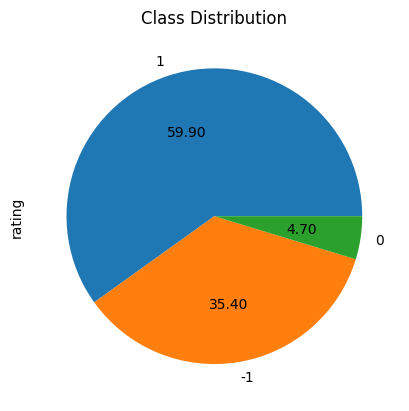

In [ ]:
ax = train_data['rating'].value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Class Distribution")

In [ ]:
train_data.review_description.duplicated().sum()

726

In [ ]:
train_data.review_description.isnull().sum()

0

In [ ]:
train_data.drop(train_data[train_data.review_description.duplicated() == True].index, axis = 0, inplace = True)


In [ ]:
train_data.review_description.duplicated().sum()

0

In [ ]:
train_data.review_description=train_data.review_description.astype(str)
train_data.review_description=train_data.review_description.apply(lambda x:re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', x))
train_data.review_description=train_data.review_description.apply(lambda x:x.replace('؛',"", ))


In [ ]:
train_data.head(5)

,review_description,rating
0,شركه زباله و سواقين بتبرشم و مفيش حتي رقم للشك...,-1
1,خدمة الدفع عن طريق الكي نت توقفت عندي اصبح فقط...,1
2,تطبيق غبي و جاري حذفه عاملين اكواد خصم و لما...,-1
3,فعلا تطبيق ممتاز بس لو فى امكانية يتيح لمستخدم...,1
4,سيء جدا اسعار رسوم التوصيل لا تمت للواقع ب ص...,-1


In [ ]:
emojis = {
    "🙂":"يبتسم",
    "😂":"يضحك",
    "💔":"قلب حزين",
    "🙂":"يبتسم",
    "❤️":"حب",
    "❤":"حب",
    "😍":"حب",
    "😭":"يبكي",
    "😢":"حزن",
    "😔":"حزن",
    "♥":"حب",
    "💜":"حب",
    "😅":"يضحك",
    "🙁":"حزين",
    "💕":"حب",
    "💙":"حب",
    "😞":"حزين",
    "😊":"سعادة",
    "👏":"يصفق",
    "👌":"احسنت",
    "😴":"ينام",
    "😀":"يضحك",
    "😌":"حزين",
    "🌹":"وردة",
    "🙈":"حب",
    "😄":"يضحك",
    "😐":"محايد",
    "✌":"منتصر",
    "✨":"نجمه",
    "🤔":"تفكير",
    "😏":"يستهزء",
    "😒":"يستهزء",
    "🙄":"ملل",
    "😕":"عصبية",
    "😃":"يضحك",
    "🌸":"وردة",
    "😓":"حزن",
    "💞":"حب",
    "💗":"حب",
    "😑":"منزعج",
    "💭":"تفكير",
    "😎":"ثقة",
    "💛":"حب",
    "😩":"حزين",
    "💪":"عضلات",
    "👍":"موافق",
    "🙏🏻":"رجاء طلب",
    "😳":"مصدوم",
    "👏🏼":"تصفيق",
    "🎶":"موسيقي",
    "🌚":"صمت",
    "💚":"حب",
    "🙏":"رجاء طلب",
    "💘":"حب",
    "🍃":"سلام",
    "☺":"يضحك",
    "🐸":"ضفدع",
    "😶":"مصدوم",
    "✌️":"مرح",
    "✋🏻":"توقف",
    "😉":"غمزة",
    "🌷":"حب",
    "🙃":"مبتسم",
    "😫":"حزين",
    "😨":"مصدوم",
    "🎼 ":"موسيقي",
    "🍁":"مرح",
    "🍂":"مرح",
    "💟":"حب",
    "😪":"حزن",
    "😆":"يضحك",
    "😣":"استياء",
    "☺️":"حب",
    "😱":"كارثة",
    "😁":"يضحك",
    "😖":"استياء",
    "🏃🏼":"يجري",
    "😡":"غضب",
    "🚶":"يسير",
    "🤕":"مرض",
    "‼️":"تعجب",
    "🕊":"طائر",
    "👌🏻":"احسنت",
    "❣":"حب",
    "🙊":"مصدوم",
    "💃":"سعادة مرح",
    "💃🏼":"سعادة مرح",
    "😜":"مرح",
    "👊":"ضربة",
    "😟":"استياء",
    "💖":"حب",
    "😥":"حزن",
    "🎻":"موسيقي",
    "✒":"يكتب",
    "🚶🏻":"يسير",
    "💎":"الماظ",
    "😷":"وباء مرض",
    "☝":"واحد",
    "🚬":"تدخين",
    "💐" : "ورد",
    "🌞" : "شمس",
    "👆" : "الاول",
    "⚠️" :"تحذير",
    "🤗" : "احتواء",
    "✖️": "غلط",
    "📍"  : "مكان",
    "👸" : "ملكه",
    "👑" : "تاج",
    "✔️" : "صح",
    "💌": "قلب",
    "😲" : "مندهش",
    "💦": "ماء",
    "🚫" : "خطا",
    "👏🏻" : "برافو",
    "🏊" :"يسبح",
    "👍🏻": "تمام",
    "⭕️" :"دائره كبيره",
    "🎷" : "ساكسفون",
    "👋": "تلويح باليد",
    "✌🏼": "علامه النصر",
    "🌝":"مبتسم",
    "➿"  : "عقده مزدوجه",
    "💪🏼" : "قوي",
    "📩":  "تواصل معي",
    "☕️": "قهوه",
    "😧" : "قلق و صدمة",
    "🗨": "رسالة",
    "❗️" :"تعجب",
    "🙆🏻": "اشاره موافقه",
    "👯" :"اخوات",
    "©" :  "رمز",
    "👵🏽" :"سيده عجوزه",
    "🐣": "كتكوت",
    "🙌": "تشجيع",
    "🙇": "شخص ينحني",
    "👐🏽":"ايدي مفتوحه",
    "👌🏽": "بالظبط",
    "⁉️" : "استنكار",
    "⚽️": "كوره",
    "🕶" :"حب",
    "🎈" :"بالون",
    "🎀":    "ورده",
    "💵":  "فلوس",
    "😋":  "جائع",
    "😛":  "يغيظ",
    "😠":  "غاضب",
    "✍🏻":  "يكتب",
    "🌾":  "ارز",
    "👣":  "اثر قدمين",
    "❌":"رفض",
    "🍟":"طعام",
    "👬":"صداقة",
    "🐰":"ارنب",
    "☂":"مطر",
    "⚜":"مملكة فرنسا",
    "🐑":"خروف",
    "🗣":"صوت مرتفع",
    "👌🏼":"احسنت",
    "☘":"مرح",
    "😮":"صدمة",
    "😦":"قلق",
    "⭕":"الحق",
    "✏️":"قلم",
    "ℹ":"معلومات",
    "🙍🏻":"رفض",
    "⚪️":"نضارة نقاء",
    "🐤":"حزن",
    "💫":"مرح",
    "💝":"حب",
    "🍔":"طعام",
    "❤︎":"حب",
    "✈️":"سفر",
    "🏃🏻‍♀️":"يسير",
    "🍳":"ذكر",
    "🎤":"مايك غناء",
    "🎾":"كره",
    "🐔":"دجاجة",
    "🙋":"سؤال",
    "📮":"بحر",
    "💉":"دواء",
    "🙏🏼":"رجاء طلب",
    "💂🏿 ":"حارس",
    "🎬":"سينما",
    "♦️":"مرح",
    "💡":"قكرة",
    "‼":"تعجب",
    "👼":"طفل",
    "🔑":"مفتاح",
    "♥️":"حب",
    "🕋":"كعبة",
    "🐓":"دجاجة",
    "💩":"معترض",
    "👽":"فضائي",
    "☔️":"مطر",
    "🍷":"عصير",
    "🌟":"نجمة",
    "☁️":"سحب",
    "👃":"معترض",
    "🌺":"مرح",
    "🔪":"سكينة",
    "♨":"سخونية",
    "👊🏼":"ضرب",
    "✏":"قلم",
    "🚶🏾‍♀️":"يسير",
    "👊":"ضربة",
    "◾️":"وقف",
    "😚":"حب",
    "🔸":"مرح",
    "👎🏻":"لا يعجبني",
    "👊🏽":"ضربة",
    "😙":"حب",
    "🎥":"تصوير",
    "👉":"جذب انتباه",
    "👏🏽":"يصفق",
    "💪🏻":"عضلات",
    "🏴":"اسود",
    "🔥":"حريق",
    "😬":"عدم الراحة",
    "👊🏿":"يضرب",
    "🌿":"ورقه شجره",
    "✋🏼":"كف ايد",
    "👐":"ايدي مفتوحه",
    "☠️":"وجه مرعب",
    "🎉":"يهنئ",
    "🔕" :"صامت",
    "😿":"وجه حزين",
    "☹️":"وجه يائس",
    "😘" :"حب",
    "😰" :"خوف و حزن",
    "🌼":"ورده",
    "💋":  "بوسه",
    "👇":"لاسفل",
    "❣️":"حب",
    "🎧":"سماعات",
    "📝":"يكتب",
    "😇":"دايخ",
    "😈":"رعب",
    "🏃":"يجري",
    "✌🏻":"علامه النصر",
    "🔫":"يضرب",
    "❗️":"تعجب",
    "👎":"غير موافق",
    "🔐":"قفل",
    "👈":"لليمين",
    "™":"رمز",
    "🚶🏽":"يتمشي",
    "😯":"متفاجأ",
    "✊":"يد مغلقه",
    "😻":"اعجاب",
    "🙉" :"قرد",
    "👧":"طفله صغيره",
    "🔴":"دائره حمراء",
    "💪🏽":"قوه",
    "💤":"ينام",
    "👀":"ينظر",
    "✍🏻":"يكتب",
    "❄️":"تلج",
    "💀":"رعب",
    "😤":"وجه عابس",
    "🖋":"قلم",
    "🎩":"كاب",
    "☕️":"قهوه",
    "😹":"ضحك",
    "💓":"حب",
    "☄️ ":"نار",
    "👻":"رعب",
    "❎":"خطء",
    "🤮":"حزن",
    '🏻':"احمر"
    }

emoticons_to_emoji = {
    ":)" : "🙂",
    ":(" : "🙁",
    "xD" : "😆",
    ":=(": "😭",
    ":'(": "😢",
    ":'‑(": "😢",
    "XD" : "😂",
    ":D" : "🙂",
    "♬" : "موسيقي",
    "♡" : "❤",
    "☻"  : "🙂",
    }

In [ ]:
diacritices = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida

                         """, re.VERBOSE)

def normalize_text(text):
  x=text
  text = re.sub("[إأآا]", "ا", text)
  text = re.sub("ى", "ي", text)
  text = re.sub("ؤ", "ء", text)
  text = re.sub("ئ", "ء", text)
  text = re.sub("ة", "ه", text)
  text = re.sub("گ", "ك", text)
  if text=='':
       text=x
  return text


def emojiTextTransform(text):
    cleantext = re.sub(r'[^\w\s]', ' ', text)
    emojistext = []

    for char in text:
        if char in emojis:
            emojistext.append(emojis[char])

    return cleantext + " ".join(emojistext)
def remove_redundant_spaces_number(text):
    text=re.sub(r'\b\d+\b', '', text)
    text = re.sub('[\u0660-\u0669]', '', text)
    text=re.sub(' +', ' ', text)
    text = re.sub(diacritices, '', text)
    return text

def remove_repeated_words_with_order(text):
    words = text.split()
    unique_words = []
    seen_words = set()

    for word in words:
        if word not in seen_words:
            unique_words.append(word)
            seen_words.add(word)

    cleaned_text = ' '.join(unique_words)
    return cleaned_text

def remove_repeating_chars(text):
    text = re.sub(r'(.)\1+', r'\1', text)
    return text



In [ ]:
train_data['review_description'] = train_data['review_description'].apply(emojiTextTransform)
train_data['review_description'] = train_data['review_description'].apply(normalize_text)
train_data['review_description'] = train_data['review_description'].apply(remove_repeating_chars)
train_data['review_description'] = train_data['review_description'].apply(remove_repeated_words_with_order)
train_data['review_description'] = train_data['review_description'].apply(remove_redundant_spaces_number)


try approach for solving imbalance data by removing zero class



In [ ]:
import numpy as np

def encoding_for_two_classes__handle_imbalance(Y):
    encod = []
    for i in Y:
        if i == -1:
            encod.append(np.array([1, 0]))
        elif i == 1:
            encod.append(np.array([0, 1]))
    y_train = np.array(encod)
    return y_train



def encoding_for_three_classes__imbalance(Y):
    encod = []
    for i in Y:
        if i == -1:
            encod.append(np.array([1,0,0 ]))
        elif i == 0:
            encod.append(np.array([0,1,0]))
        elif i == 1:
            encod.append(np.array([0,0,1]))
    y_train = np.array(encod)
    return y_train


In [ ]:
print(len(train_data))

31310


In [ ]:
x_train_with_imbalnce_with_3_classes=train_data["review_description"]
y_train_with_imbalnce_with_3_classes=encoding_for_three_classes__imbalance(train_data["rating"])
print(" ",x_train_with_imbalnce_with_3_classes.shape)
print("y_train_with_imbalnce_with_3_classes_shape",y_train_with_imbalnce_with_3_classes.shape)

x_train_with_imbalnce_with_3_classes_shape (31310,)
y_train_with_imbalnce_with_3_classes_shape (31310, 3)


In [ ]:
class_1 = train_data[train_data['rating'] == 1]
class_minus_1 =train_data[train_data['rating'] == -1]
da= pd.concat([class_1, class_minus_1])
da = da.sample(frac=1, random_state=42).reset_index(drop=True)
x_train_with_imbalnce_with_2_classes=da["review_description"]
y_train_with_imbalnce_with_2_classes=encoding_for_two_classes__handle_imbalance(da["rating"])
print(da["rating"].value_counts())
print("x_train_with_imbalnce_with_2_classes_shape",x_train_with_imbalnce_with_2_classes.shape)
print("y_train_with_imbalnce_with_2_classes_shape",y_train_with_imbalnce_with_2_classes.shape)

 1    18655
-1    11163
Name: rating, dtype: int64
x_train_with_imbalnce_with_2_classes_shape (29818,)
y_train_with_imbalnce_with_2_classes_shape (29818, 2)


In [ ]:
# for experment three make balance between two classess  11000 sample from each class

from sklearn.utils import resample
class_1 = train_data[train_data['rating'] == 1]
class_minus_1 = train_data[train_data['rating'] == -1]
#class_3 = train_data[train_data['rating'] ==0]
num_samples = 11000

undersampled_class_1 = resample(class_1, replace=False, n_samples=num_samples, random_state=42)
undersampled_class_minus_1 = resample(class_minus_1, replace=False, n_samples=num_samples, random_state=42)

undersampled_df = pd.concat([undersampled_class_1, undersampled_class_minus_1])

train_data_balance = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:

x_train_with_balnce_with_2_classes=train_data_balance["review_description"]

y_train_with_balnce_with_2_classes=encoding_for_two_classes__handle_imbalance(train_data_balance["rating"])

print(train_data_balance["rating"].value_counts())

print("x_train_with_balnce_with_2_classes.shape",x_train_with_balnce_with_2_classes.shape)

print("y_train_with_balnce_with_2_classes_shape",y_train_with_balnce_with_2_classes.shape)

-1    11000
 1    11000
Name: rating, dtype: int64
x_train_with_balnce_with_2_classes.shape (22000,)
y_train_with_balnce_with_2_classes_shape (22000, 2)


In [ ]:
#enocding for two classses
tokenizer = Tokenizer(num_words=10000)
def encode_covert_to_numbers(x_ttrain):
    tokenizer.fit_on_texts(x_ttrain)

    X_train_seq_balance_2_classes = tokenizer.texts_to_sequences(x_ttrain)

    X_train_pad_balance_with2_classes = pad_sequences(X_train_seq_balance_2_classes, maxlen=100)
X_train_pad_balance_with2_classes=encode_covert_to_numbers(y_train_with_balnce_with_2_classes)

In [ ]:
def build_model(X_train_pad,Y_train,num_class):
  model = Sequential()
  model.add(Embedding(10000, 128, input_length=100))
  model.add(LSTM(128) )
  model.add(Dense(num_class, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

  model.fit(X_train_pad, Y_train, validation_split=0.2, epochs=15, batch_size=32, callbacks=[early_stopping])
  return model



In [ ]:
#experment1
model=build_model(X_train_pad_balance_with2_classes,y_train_with_balnce_with_2_classes,2)

Epoch 1/15
550/550 [==============================] - 112s 198ms/step - loss: 0.3774 - accuracy: 0.8355 - val_loss: 0.2993 - val_accuracy: 0.8750
Epoch 2/15
550/550 [==============================] - 113s 206ms/step - loss: 0.2352 - accuracy: 0.9095 - val_loss: 0.3058 - val_accuracy: 0.8730
Epoch 3/15
550/550 [==============================] - 103s 188ms/step - loss: 0.1820 - accuracy: 0.9315 - val_loss: 0.3710 - val_accuracy: 0.8682
Epoch 4/15
550/550 [==============================] - 107s 194ms/step - loss: 0.1505 - accuracy: 0.9438 - val_loss: 0.3779 - val_accuracy: 0.8600
Epoch 5/15
550/550 [==============================] - 104s 190ms/step - loss: 0.1226 - accuracy: 0.9532 - val_loss: 0.4514 - val_accuracy: 0.8607
Epoch 6/15
550/550 [==============================] - 107s 195ms/step - loss: 0.1075 - accuracy: 0.9584 - val_loss: 0.5518 - val_accuracy: 0.8605


In [ ]:

# testing experiment 1 two classes imbalance
test_data=pd.read_csv("/content/test _no_label.csv")
test_data['review_description'] = test_data['review_description'].apply(emojiTextTransform)
test_data['review_description'] = test_data['review_description'].apply(normalize_text)
test_data['review_description'] = test_data['review_description'].apply(remove_repeating_chars)
test_data['review_description'] = test_data['review_description'].apply(remove_repeated_words_with_order)
test_data['review_description'] = test_data['review_description'].apply(remove_redundant_spaces_number)

x_test_with_balnce_with_2_classes=test_data['review_description']

X_test_seq_balance_2_classes = tokenizer.texts_to_sequences(x_test_with_balnce_with_2_classes)
X_test_pad_balance_2_classes  = pad_sequences(X_test_seq_balance_2_classes, maxlen=100)



In [ ]:
prediction_of_experemit1_balance=model.predict(X_test_pad_balance_2_classes)
print(prediction_of_experemit1_balance)

32/32 [==============================] - 2s 46ms/step
[[0.8428302  0.15716985]
 [0.05079281 0.9492072 ]
 [0.73175275 0.26824734]
 ...
 [0.33834505 0.661655  ]
 [0.9506584  0.0493416 ]
 [0.03047515 0.96952486]]


In [ ]:
predicton_balance_2_classess=np.argmax(prediction_of_experemit1_balance,1)
for i in range(len(predicton_balance_2_classess)):
  if predicton_balance_2_classess[i]==0:
    predicton_balance_2_classess[i]=-1
  if predicton_balance_2_classess[i]==1:
        predicton_balance_2_classess[i]=1

-1


In [ ]:
ids=test_data["ID"]
submission=pd.DataFrame()
submission['ID']=test_data['ID']
submission['rating']=predicton_balance_2_classess
submission.to_csv("LSTM.csv",index = False)

#67

trying another apporach of preprocessing get high accauarcy



In [ ]:
train_data_with_different_preprocessing_its_get_high_acc=pd.read_excel("/content/train.xlsx")


In [ ]:

# another apporach for prerprocessing wtihout stemming  just claen text(remove_punctuation,remove_stop_words,remove_numbers_A/E)
# and normlize it  handle if cell is null


from nltk.corpus import stopwords
nltk.download('stopwords')
punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation
stop_words = stopwords.words('arabic')

def preprocess(text):
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)


    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    text = re.sub(r'\d+', '', text)
    #text = re.sub(r'[^؀-ۿa-zA-Z\s]', '', text)
    text = re.sub(r'\b\d+\b', '', text)
    re.sub(r'[٠-٩]', '', text)


    text = ' '.join(word for word in text.split() if word not in stop_words)
    if text=='':
        text="رودينا"

    return text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# the same as prevaious experiment  hande
# 1 remove the class zero it is 4%
# 2 trying to make balance between  two others calss 1 and -1  and run experiment
# result its get 80% accuarcy

from sklearn.utils import resample
class_1 = train_data[train_data['rating'] == 1]
class_minus_1 = train_data[train_data['rating'] == -1]
#class_3 = train_data[train_data['rating'] ==0]
num_samples = 11000

undersampled_class_1 = resample(class_1, replace=False, n_samples=num_samples, random_state=42)
undersampled_class_minus_1 = resample(class_minus_1, replace=False, n_samples=num_samples, random_state=42)

undersampled_df = pd.concat([undersampled_class_1, undersampled_class_minus_1])

train_data = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)
print(train_data["rating"].value_counts())

X_train=train_data["review_description"].apply(preprocess)
Y_train=train_data["rating"]
X_train.head(5)
print(len(Y_train))
print(len(X_train))
import numpy as np
encod=[]
for i in Y_train:
    if i==-1:
        encod.append(np.array([1,0]))
    if i==1:
        encod.append(np.array([0,1]))

    if i==2:
        encod.append(np.array([0,0,1]))
Y_train=encod
Y_train=np.array(Y_train)

print(Y_train.shape)




tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=100)


model = Sequential()
model.add(Embedding(10000, 128, input_length=100))
model.add(LSTM(128) ) # Added dropout for regularization
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(X_train_pad, Y_train, validation_split=0.2, epochs=15, batch_size=32, callbacks=[early_stopping])



-1    11000
 1    11000
Name: rating, dtype: int64
22000
22000
(22000, 2)
Epoch 1/15
550/550 [==============================] - 24s 41ms/step - loss: 0.4151 - accuracy: 0.8102 - val_loss: 0.3472 - val_accuracy: 0.8573
Epoch 2/15
550/550 [==============================] - 7s 12ms/step - loss: 0.2592 - accuracy: 0.8982 - val_loss: 0.3561 - val_accuracy: 0.8552
Epoch 3/15
550/550 [==============================] - 6s 11ms/step - loss: 0.2042 - accuracy: 0.9209 - val_loss: 0.3891 - val_accuracy: 0.8505
Epoch 4/15
550/550 [==============================] - 5s 9ms/step - loss: 0.1712 - accuracy: 0.9317 - val_loss: 0.4513 - val_accuracy: 0.8477
Epoch 5/15
550/550 [==============================] - 5s 9ms/step - loss: 0.1461 - accuracy: 0.9411 - val_loss: 0.4955 - val_accuracy: 0.8409
Epoch 6/15
550/550 [==============================] - 5s 9ms/step - loss: 0.1275 - accuracy: 0.9463 - val_loss: 0.5963 - val_accuracy: 0.8436


In [ ]:
# testing on balance with_two_classess
test_data=pd.read_csv("/content/test _no_label.csv")
ids=test_data['ID']
X_test=test_data['review_description']
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)


prediction = model.predict(X_test_pad)

32/32 [==============================] - 1s 6ms/step


In [ ]:
prediction = np.argmax(prediction,axis = 1)
print(prediction)

[1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1
 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0
 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0
 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0
 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0
 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0
 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1
 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 0 1 

In [ ]:
for i in range(0,len(prediction)):
    if prediction[i]==0:
        prediction[i]=-1
    else:
        prediction[i]=1


In [ ]:
submission=pd.DataFrame()
submission['ID']=ids
submission['rating']=prediction
submission.to_csv('Aya.csv', index=False)

In [ ]:
#another approch on two class positive & negative with imbalance get result best from prevaious one
# resample on data

train_data=pd.read_excel("/content/train.xlsx")


from sklearn.utils import resample


class_1 = train_data[train_data['rating'] == 1]
class_minus_1 = train_data[train_data['rating'] == -1]

undersampled_df = pd.concat([class_1, class_minus_1])

train_data = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(train_data["rating"].value_counts())

X_train=train_data["review_description"].apply(preprocess)
Y_train=train_data["rating"]

import numpy as np
encod=[]
for i in Y_train:
    if i==-1:
        encod.append(np.array([1,0]))
    if i==1:
        encod.append(np.array([0,1]))

    if i==2:
        encod.append(np.array([0,0,1]))
Y_train=encod
Y_train=np.array(Y_train)




tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=100)


model = Sequential()
model.add(Embedding(10000, 128, input_length=100))
model.add(LSTM(128) )
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train_pad, Y_train, validation_split=0.2, epochs=15, batch_size=32, callbacks=[early_stopping])



 1    19189
-1    11340
Name: rating, dtype: int64
Epoch 1/15
764/764 [==============================] - 28s 33ms/step - loss: 0.3732 - accuracy: 0.8401 - val_loss: 0.3188 - val_accuracy: 0.8700
Epoch 2/15
764/764 [==============================] - 9s 11ms/step - loss: 0.2442 - accuracy: 0.9068 - val_loss: 0.3285 - val_accuracy: 0.8664
Epoch 3/15
764/764 [==============================] - 7s 10ms/step - loss: 0.1926 - accuracy: 0.9279 - val_loss: 0.3953 - val_accuracy: 0.8651
Epoch 4/15
764/764 [==============================] - 7s 9ms/step - loss: 0.1589 - accuracy: 0.9411 - val_loss: 0.4310 - val_accuracy: 0.8556
Epoch 5/15
764/764 [==============================] - 7s 9ms/step - loss: 0.1409 - accuracy: 0.9466 - val_loss: 0.4916 - val_accuracy: 0.8524
Epoch 6/15
764/764 [==============================] - 6s 8ms/step - loss: 0.1252 - accuracy: 0.9523 - val_loss: 0.5409 - val_accuracy: 0.8479


In [ ]:
# testing
test_data=pd.read_csv("/content/test _no_label.csv")
ids=test_data['ID']
X_test=test_data['review_description']
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)


prediction = model.predict(X_test_pad)
prediction = np.argmax(prediction,axis = 1)
print(prediction)
for i in range(0,len(prediction)):
    if prediction[i]==0:
        prediction[i]=-1
    else:
        prediction[i]=1

submission=pd.DataFrame()
submission['ID']=ids
submission['rating']=prediction
submission.to_csv('Aya_last.csv', index=False)

32/32 [==============================] - 0s 4ms/step
[1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1
 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0
 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1
 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0
 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1
 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0
 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1
 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 

In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Embedding, GlobalAveragePooling1D, Dense, Dropout
from keras.callbacks import EarlyStopping



train_data=pd.read_excel("/content/train.xlsx")
from nltk.corpus import stopwords
nltk.download('stopwords')

punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation
stop_words = stopwords.words('arabic')
def preprocess(text):
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)


    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    text = re.sub(r'\d+', '', text)
    #text = re.sub(r'[^؀-ۿa-zA-Z\s]', '', text)
    text = re.sub(r'\b\d+\b', '', text)


    text = ' '.join(word for word in text.split() if word not in stop_words)
    if text=='':
        text="حناوى"





    return text

from sklearn.utils import resample

class_1 = train_data[train_data['rating'] == 1]
class_minus_1 = train_data[train_data['rating'] == -1]

undersampled_df = pd.concat([class_1, class_minus_1])

train_data = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)
print(train_data["rating"].value_counts())

X_train=train_data["review_description"].apply(preprocess)
Y_train=train_data["rating"]
X_train.head(5)
print(len(Y_train))
print(len(X_train))
import numpy as np
encod=[]
for i in Y_train:
    if i==-1:
        encod.append(np.array([1,0]))
    if i==1:
        encod.append(np.array([0,1]))

    if i==2:
        encod.append(np.array([0,0,1]))
Y_train=encod
Y_train=np.array(Y_train)

print(Y_train.shape)


tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=100)



import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Embedding, GlobalAveragePooling1D, Dense, Dropout

def transformer__classification_model(max_seq_length, vocab_size, num_heads=8, ff_dim=32, num_blocks=6, dropout_rate=0.1):
    inputs = Input(shape=(max_seq_length,))

    embedding_layer = Embedding(input_dim=vocab_size, output_dim=128)(inputs)

    x = embedding_layer
    for _ in range(num_blocks):
        x = transformer_block(x, max_seq_length, num_heads, ff_dim, dropout_rate)

    x = GlobalAveragePooling1D()(x)

    # Dense layers for binary classification
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.1)(x)
    outputs = Dense(2, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)

    return model

def transformer_block(x, max_seq_length, num_heads, ff_dim, dropout_rate=0.1):
    # Multi-Head Self Attention
    multi_head_attention = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads, key_dim=256, dropout=dropout_rate
    )(x, x)

    # Add & Norm
    x = tf.keras.layers.Add()([x, multi_head_attention])
    x = tf.keras.layers.LayerNormalization()(x)

    # Feed Forward Part
    ff = tf.keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation='relu')(x)
    ff = tf.keras.layers.Dropout(dropout_rate)(ff)
    ff = tf.keras.layers.Conv1D(filters=128, kernel_size=1)(ff)

    # Add & Norm
    x = tf.keras.layers.Add()([x, ff])
    x = tf.keras.layers.LayerNormalization()(x)

    return x

# Example usage:
max_seq_length = 100
vocab_size = 10000
num_heads = 4
ff_dim = 20
num_blocks = 3
dropout_rate = 0.1

model = transformer__classification_model(max_seq_length, vocab_size, num_heads, ff_dim, num_blocks, dropout_rate)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(X_train_pad, Y_train, validation_split=0.2, epochs=15, batch_size=32, callbacks=[early_stopping])



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 1    19189
-1    11340
Name: rating, dtype: int64
30529
30529
(30529, 2)
Epoch 1/15
764/764 [==============================] - 52s 56ms/step - loss: 0.5661 - accuracy: 0.7158 - val_loss: 0.3914 - val_accuracy: 0.8426
Epoch 2/15
764/764 [==============================] - 29s 38ms/step - loss: 0.3587 - accuracy: 0.8596 - val_loss: 0.3634 - val_accuracy: 0.8534
Epoch 3/15
764/764 [==============================] - 28s 37ms/step - loss: 0.3175 - accuracy: 0.8804 - val_loss: 0.3864 - val_accuracy: 0.8600
Epoch 4/15
764/764 [==============================] - 27s 36ms/step - loss: 0.3555 - accuracy: 0.8802 - val_loss: 0.4206 - val_accuracy: 0.8582
Epoch 5/15
764/764 [==============================] - 27s 36ms/step - loss: 0.3415 - accuracy: 0.8889 - val_loss: 0.4283 - val_accuracy: 0.8472
Epoch 6/15
764/764 [==============================] - 27s 36ms/step - loss: 0.3413 - accuracy: 0.8890 - val_loss: 0.4265 - val_accuracy: 0.8449
Epoch 7/15
764/764 [==============================] - 28s 37ms

In [ ]:
test_data=pd.read_csv("/content/test _no_label.csv")
ids=test_data['ID']
X_test=test_data['review_description']
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)


prediction = model.predict(X_test_pad)
prediction = np.argmax(prediction,axis = 1)
#print(prediction)
for i in range(0,len(prediction)):
    if prediction[i]==0:
        prediction[i]=-1
    else:
        prediction[i]=1

submission=pd.DataFrame()
submission['ID']=ids
submission['rating']=prediction
submission.to_csv('Aya_last_last.csv', index=False)

32/32 [==============================] - 0s 6ms/step


In [ ]:
# experments on three classses
x_train_with_imbalnce_with_3_classes=train_data["review_description"].apply(preprocess)
y_train_with_imbalnce_with_3_classes=encoding_for_three_classes__imbalance(train_data["rating"])
print("x_train_with_imbalnce_with_3_classes_shape",x_train_with_imbalnce_with_3_classes.shape)
print("y_train_with_imbalnce_with_3_classes_shape",y_train_with_imbalnce_with_3_classes.shape)


x_train_with_imbalnce_with_3_classes_shape (30529,)
y_train_with_imbalnce_with_3_classes_shape (30529, 3)


In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train_with_imbalnce_with_3_classes)

X_train_seq3 = tokenizer.texts_to_sequences(x_train_with_imbalnce_with_3_classes)
X_train_pad3 = pad_sequences(X_train_seq3, maxlen=100)



In [ ]:
# note validation making on 20% from data in each epoch

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, EarlyStopping
import numpy as np





max_words =10000
embedding_dim = 100
lstm_units = 50
conv_filters = 100
kernel_size = 3
dense_units = 50
num_classes = 3
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=100))

model.add(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))

model.add(Conv1D(filters=conv_filters, kernel_size=kernel_size, activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(units=dense_units, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=num_classes, activation='softmax'))
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
batch_size = 150
epochs = 15
def lr_schedule(epoch, lr):
    return lr * 0.9 ** epoch
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lr_schedule)
history = model.fit(X_train_pad3, y_train_with_imbalnce_with_3_classes, validation_split=0.2, batch_size=batch_size, epochs=epochs, callbacks=[early_stopping, lr_scheduler])


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 lstm_11 (LSTM)              (None, 100, 50)           30200     
                                                                 
 conv1d_6 (Conv1D)           (None, 98, 100)           15100     
                                                                 
 global_max_pooling1d_6 (Gl  (None, 100)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_18 (Dense)            (None, 50)                5050      
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                     

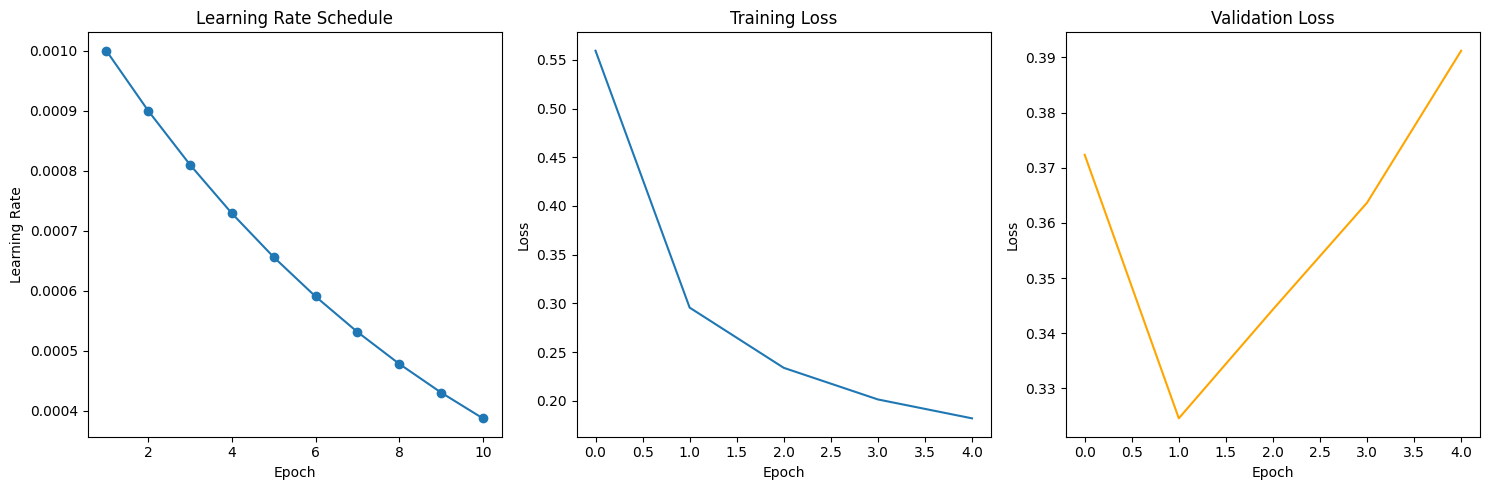

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

  # Plot learning rate schedule
plt.subplot(1, 3, 1)
plt.plot(range(1, 11), [lr_schedule(epoch, initial_learning_rate) for epoch in range(10)], marker='o')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')

# Plot training loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot validation loss
plt.subplot(1, 3, 3)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


In [ ]:
test_data=pd.read_csv("/content/test _no_label.csv")
def test_function(model):
    """
     np.argmax it searches for max probability  in vector of prediction and get index of it like  [0.7,0.2,0.3]
     [0.7,0.2,0.3] the prediction of model the max prediction is 0.7 so it is convert to [1,0,0]
     it is negative class according to onehotenocding
      -1-->[1,0,0]-->0 index
      0-->[0,1,0]--> 1 index
      1-->[0,0,1]-->2 --> index

    """

    x_test_with_balnce_with_3_classes=test_data['review_description'].apply(preprocess)
    X_test_seq_balance_3_classes = tokenizer.texts_to_sequences(x_test_with_balnce_with_3_classes)
    X_test_pad_balance_3_classes  = pad_sequences(X_test_seq_balance_3_classes, maxlen=100)
    prediction = model.predict(X_test_pad_balance_3_classes)
    print(prediction)
    prediction = np.argmax(prediction,axis = 1)
    print(prediction)
    for i in range(0, len(prediction)):
      if prediction[i] == 0:
           prediction[i] = -1
      elif prediction[i] == 2:
           prediction[i] = 1
      else:
           prediction[i] = 0
    submission=pd.DataFrame()
    submission['ID']=test_data.ID
    submission['rating']=prediction
    submission.to_csv('submit3.csv', index=False)
    print(prediction)











In [ ]:
#testing
test_function(model)

32/32 [==============================] - 1s 29ms/step
[[2.8201717e-01 1.0111830e-03 7.1697164e-01]
 [9.1122845e-03 2.8385612e-05 9.9085933e-01]
 [3.3323455e-01 1.5002987e-03 6.6526520e-01]
 ...
 [1.9987938e-01 1.9672788e-03 7.9815340e-01]
 [2.5580141e-01 1.7847759e-03 7.4241382e-01]
 [9.8397887e-01 4.0572872e-05 1.5980495e-02]]
[2 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 0 2 0 2 2 2 2 0 0 2 2 2 0 2 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 0 0 0 2 0 0 0 0 2 2 0 0 2 2 0 2 0 0 0 2 2 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 2 0 0 0 0 2 2 0 0 2 2 2
 2 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 0 2 2 2 0 0 2 0 2 0 0 0
 2 2 2 2 2 0 0 2 2 0 2 2 2 2 2 2 0 0 0 2 2 2 2 0 2 2 2 2 2 0 2 0 0 2 2 2 2
 2 2 2 2 2 2 0 2 2 0 2 0 2 2 2 2 2 2 0 0 2 2 0 2 2 0 0 2 2 0 2 2 0 2 2 2 0
 0 2 0 2 0 0 0 2 2 2 2 2 2 2 0 2 0 2 0 0 0 2 0 2 2 0 0 2 2 0 2 0 0 2 0 2 2
 2 2 2 0 2 2 2 0 0 0 2 0 2 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 2 2 0 2 2 2 2 2 2
 2 2 2 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 0 0 2 0 2 2 2 2 2 0 0

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import LearningRateScheduler, EarlyStopping
import numpy as np

model_rnn = Sequential()
model_rnn.add(Embedding(10000, 128, input_length=100))
model_rnn.add(SimpleRNN(50))
model_rnn.add(Dense(3, activation='softmax'))

initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
model_rnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model_rnn.summary()

batch_size = 150
epochs = 10

def lr_schedule(epoch, lr):
    return lr * 0.9 ** epoch



early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lr_schedule)

history = model_rnn.fit(X_train_pad3, y_train_with_imbalnce_with_3_classes, validation_split=0.2, batch_size=batch_size, epochs=epochs, callbacks=[early_stopping, lr_scheduler])



Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 100, 128)          1280000   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50)                8950      
                                                                 
 dense_20 (Dense)            (None, 3)                 153       
                                                                 
Total params: 1289103 (4.92 MB)
Trainable params: 1289103 (4.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
163/163 [==============================] - 30s 172ms/step - loss: 0.4817 - accuracy: 0.7854 - val_loss: 0.3547 - val_accuracy: 0.8488 - lr: 0.0010
Epoch 2/10
163/163 [==============================] - 21s 131ms/step - loss: 0.3332 - accuracy: 0.8659 - val_loss: 0.3581

In [ ]:
test_function(model_rnn)

32/32 [==============================] - 0s 8ms/step
[[0.12018842 0.00259226 0.8772193 ]
 [0.01274662 0.00148052 0.9857729 ]
 [0.3678698  0.00377372 0.62835646]
 ...
 [0.14961147 0.00259504 0.8477935 ]
 [0.23557286 0.00371633 0.7607108 ]
 [0.95027936 0.00540559 0.04431508]]
[2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2 0 0 2 0 2 2 2 2 2 0 2 2 2 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 0 0 0 2 0 0 2 0 2 2 0 0 2 2 0 2 0 0 0 2 2 0
 0 0 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 2 2 0 2 0 2 2 0 0 2 2 2
 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 0 0 2 2 2 0 2 2 2 2 0 0 2 0 2 0 0 2
 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2 2 2 2 0 2 0 0 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2 0 0 2 2 0 2 2 2 0
 2 2 0 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 0 2 2 2 2 2 0 0 2 2 0 2 0 0 2 0 2 2
 2 2 0 2 2 2 2 0 0 0 2 0 2 0 0 2 0 0 2 2 2 2 2 2 0 0 2 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 0 0 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 2 2

In [ ]:

def lr_schedule(epoch):
    if epoch < 5:
        return 0.0001
    elif epoch <10:
        return 0.001

lr_scheduler = LearningRateScheduler(lr_schedule)


def transformer_classification_model(max_seq_length, vocab_size, num_heads=8, ff_dim=32, num_blocks=6, dropout_rate=0.1):

    inputs = Input(shape=(max_seq_length,))

    embedding_layer = Embedding(input_dim=vocab_size, output_dim=128)(inputs)

    x = embedding_layer
    for _ in range(num_blocks):
        x = transformer_block(x, max_seq_length, num_heads, ff_dim, dropout_rate)

    x = GlobalAveragePooling1D()(x)

    x = Dense(64, activation='relu')(x)
    x = Dropout(0.1)(x)
    outputs = Dense(3, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)

    return model

def transformer_block(x, max_seq_length, num_heads, ff_dim, dropout_rate=0.1):
    # Multi-Head Self Attention
    multi_head_attention = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads, key_dim=256, dropout=dropout_rate
    )(x, x)

    # Add & Norm
    x = tf.keras.layers.Add()([x, multi_head_attention])
    x = tf.keras.layers.LayerNormalization()(x)

    # Feed Forward Part
    ff = tf.keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation='relu')(x)
    ff = tf.keras.layers.Dropout(dropout_rate)(ff)
    ff = tf.keras.layers.Conv1D(filters=128, kernel_size=1)(ff)

    # Add & Norm
    x = tf.keras.layers.Add()([x, ff])
    x = tf.keras.layers.LayerNormalization()(x)

    return x

max_seq_length = 100
vocab_size = 10000
num_heads = 7
ff_dim = 20
num_blocks = 3
dropout_rate = 0.1

model = transformer_classification_model(max_seq_length, vocab_size, num_heads, ff_dim, num_blocks, dropout_rate)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

h=model.fit(X_train_pad3, y_train_with_imbalnce_with_3_classes, validation_split=0.2, epochs=15, batch_size=32, callbacks=[early_stopping,lr_scheduler])



Epoch 1/15
764/764 [==============================] - 68s 75ms/step - loss: 0.4416 - accuracy: 0.8013 - val_loss: 0.3457 - val_accuracy: 0.8534 - lr: 1.0000e-04
Epoch 2/15
764/764 [==============================] - 46s 61ms/step - loss: 0.2942 - accuracy: 0.8839 - val_loss: 0.3535 - val_accuracy: 0.8664 - lr: 1.0000e-04
Epoch 3/15
764/764 [==============================] - 45s 59ms/step - loss: 0.2435 - accuracy: 0.9088 - val_loss: 0.3662 - val_accuracy: 0.8519 - lr: 1.0000e-04
Epoch 4/15
764/764 [==============================] - 45s 59ms/step - loss: 0.2087 - accuracy: 0.9231 - val_loss: 0.4142 - val_accuracy: 0.8544 - lr: 1.0000e-04
Epoch 5/15
764/764 [==============================] - 45s 59ms/step - loss: 0.1811 - accuracy: 0.9344 - val_loss: 0.4936 - val_accuracy: 0.8521 - lr: 1.0000e-04
Epoch 6/15
764/764 [==============================] - 44s 58ms/step - loss: 0.6625 - accuracy: 0.6330 - val_loss: 0.6694 - val_accuracy: 0.6122 - lr: 0.0010


In [ ]:
test_function(model)

32/32 [==============================] - 1s 22ms/step
[[3.9771801e-01 3.0088206e-04 6.0198110e-01]
 [1.6457841e-02 9.6437165e-05 9.8344570e-01]
 [4.8195553e-01 3.9283649e-04 5.1765162e-01]
 ...
 [1.3238643e-01 8.0266844e-05 8.6753327e-01]
 [3.2702655e-01 1.7857907e-04 6.7279482e-01]
 [9.6044081e-01 1.6908505e-04 3.9390113e-02]]
[2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 0 2 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 2 0 2 0 0 0 2 2 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 2 0 0 2 0 2 2 0 0 2 2 2
 2 2 0 2 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 0 2 0 2 0 0 2
 2 2 2 2 2 0 0 2 2 0 2 2 2 2 2 2 0 0 0 2 2 2 2 0 2 2 0 2 2 0 2 0 0 2 2 2 2
 2 2 2 2 2 2 0 2 2 0 2 0 2 2 2 2 2 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 2 2 0
 0 2 0 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 0 0 2 2 2 2 2 0 0 2 2 0 2 0 0 2 0 2 2
 2 2 2 2 2 2 2 0 0 0 2 0 2 0 0 2 0 0 2 2 2 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2
 0 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 0 0 2 2 2 2 2 2 2 0 0